In [90]:
# eda: Exploratrory data analytics - mainly discovering what features or chracterstics that have most impact on target varibale
    #1 summarrizing the main characterstics of data
    #2 gain better understanding of datset
    #3 uncover relationship b/w variables
    #4 extract important varibales
# methods for eda
    #1 descriptive statsics : to obtain the short summaries of sample and measures of data
        #1 pandas describe method: summarizes statstics
        #2 pandas value_counts() method: summarizes categorical data
        #3 box plot(seaborn): great way to visualoze numerical data, easy to see the distribution of data
        #4 scatter plot(matplotlib): each observation repersented as a point: shows relation between varibles. 
                                     # predictor/indpendent varable on x-axis, dependent/target varibale on y-axis
    #2 groupby : to group the data based on categorical varibales and analyze
        #1 pandas group_by method
        #2 pandas pivot method: displays pandas groupby results in more visual format (rectangular formats). 
                                # displays one varibale values along column and other varible values as row 
        #3 heat map plot (matplotlib): takes a rectangular data and assigns colour intensity based on data value at the grid point.
                          # great way to plot target varible over multiple variables 
    #3 correlation  : measures to what extent different varibles are dependent. eg: smoke--> lung cancer
                     # correlation does not imply causation eg: umberealla does n't cause rain
                     # seaaborn regplot: correlation +ve, -ve linear relationship, weak,strong corelation
    #4 correaltion statstics: methods to measure the strength of correlation b/w 2 features
        #1 pearson correlation (scipy stats)- it gives 2 values
            #1 correlation coefficent:
                # close to +1: large possitive relationship
                # close to -1: large negative realationship
                # close to 0: no relationship
            #2 p-value:
                # p-value < 0.001 : strong certainity in result
                # p-value < 0.05 : moderate certainity in result
                # p-value < 0.1 : weak ceratinity in result
                # p-value > 0.1 : no certainity in result
        #2 correlation heat map: it gives relation b/w every two varaibles based on correlation-coefficent value by taking coorelation dataframeas input.
        #3 chi-square test: The chi-square test is a statistical test used to determine whether there is a significant association between categorical variables but not type of association.
                            # It is typically used when you have categorical data from independent groups and want to see if there is a relationship between them.
                            # The test works by comparing the observed frequencies of data with the frequencies that would be expected if there were no relationship between the variables. 
                            # It calculates a chi-square statistic based on the differences between observed and expected frequencies, and then determines whether these differences are 
                            # large enough to reject the null hypothesis, which states that there is no association between the variables.
                            # formula: x2 = sigma i=1 to n((Oi-Ei)^2 / Ei)
                            # Ei = (row_total*column_total)/grand_total
        #4 avova (analysis of variance) : The Analysis of Variance (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups.
                            # ANOVA returns two parameters:
                                # F-test score: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score.
                                                # A larger score means there is a larger difference between the means.
                                # P-value: P-value tells how statistically significant our calculated score value is.

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('./datasets/EDAautomobile.csv')

In [4]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [5]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price',
       'city-L/100km', 'horsepower-binned', 'diesel', 'gas'],
      dtype='object')

### 1. Descriptive Statsics

#### 1.1 Descibe Method

In [6]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


In [8]:
df.describe(include='all')

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
count,201.000000,201.00000,201,201,201,201,201,201,201.000000,201.000000,...,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,200,201.000000,201.000000
unique,NaN,NaN,22,2,2,5,3,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN
top,NaN,NaN,toyota,std,four,sedan,fwd,front,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low,NaN,NaN
freq,NaN,NaN,32,165,115,94,118,198,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,115,NaN,NaN
mean,0.840796,122.00000,NaN,NaN,NaN,NaN,NaN,NaN,98.797015,0.837102,...,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,NaN,0.099502,0.900498
std,1.254802,31.99625,NaN,NaN,NaN,NaN,NaN,NaN,6.066366,0.059213,...,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,NaN,0.300083,0.300083
min,-2.000000,65.00000,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,0.678039,...,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,NaN,0.000000,0.000000
25%,0.000000,101.00000,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,0.801538,...,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,NaN,0.000000,1.000000
50%,1.000000,122.00000,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,0.832292,...,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,NaN,0.000000,1.000000
75%,2.000000,137.00000,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,0.881788,...,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,NaN,0.000000,1.000000


#### 1.2 value_counts() method

In [9]:
df['drive-wheels'].value_counts()

drive-wheels
fwd    118
rwd     75
4wd      8
Name: count, dtype: int64

#### 1.3 Box Plots

In [15]:
# IQR - inter quartile range (25% to 75%)
# median
# upper quartile 75%
# lower quartile 25%
# upper extreme 1.5*upper quartile
# lower extreme 1.5*lower quartile
# whisker: (uq to ue, lq to le)
# outliers

In [13]:
import seaborn as sns

<Axes: xlabel='drive-wheels', ylabel='price'>

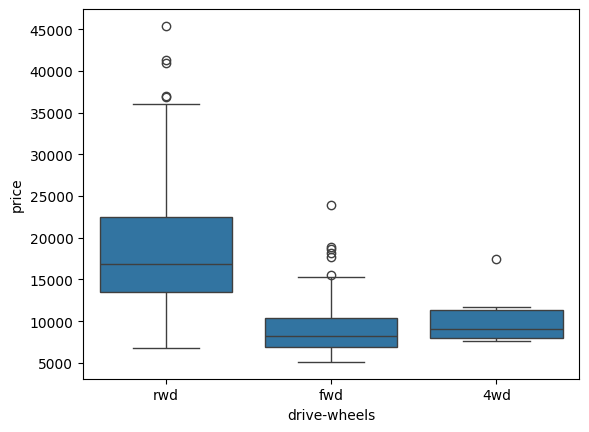

In [14]:
sns.boxplot(x='drive-wheels', y= 'price',data=df)

#### 1.4 scatter plot

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'price of car')

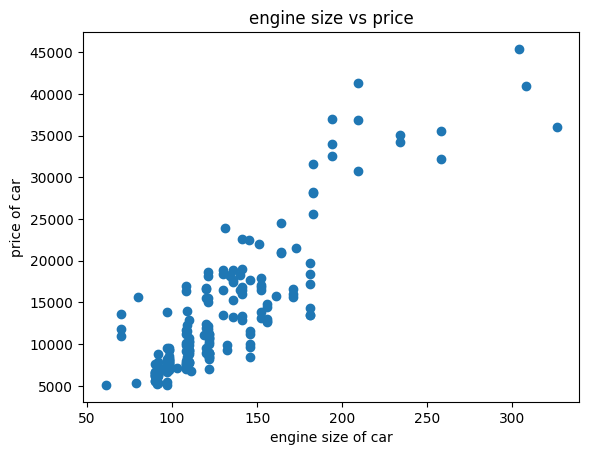

In [19]:
x = df['engine-size']
y = df['price']
plt.scatter(x,y)
plt.title('engine size vs price')
plt.xlabel('engine size of car')
plt.ylabel('price of car')

### 2. groupby (Grouping data and analyzing)

#### 2.1 pandas groupby method

In [28]:
df_grp = df[['drive-wheels', 'body-style', 'price']].groupby(['drive-wheels','body-style'],as_index=False).mean()
df_grp

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


#### 2.2 pandas pivot method

In [68]:
grouped_pivot = df_grp.pivot(index='drive-wheels', columns='body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

#### 2.3 heatmap plot

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4600\3476065488.py:6: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  plt.colorbar()


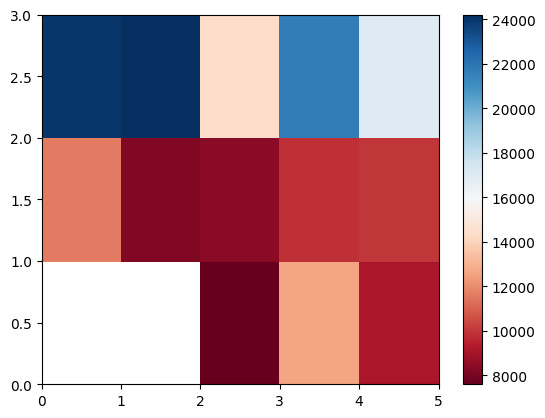

In [71]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

In [77]:
grouped_pivot.columns

MultiIndex([('price', 'convertible'),
            ('price',     'hardtop'),
            ('price',   'hatchback'),
            ('price',       'sedan'),
            ('price',       'wagon')],
           names=[None, 'body-style'])

In [78]:
grouped_pivot.columns.levels[1]

Index(['convertible', 'hardtop', 'hatchback', 'sedan', 'wagon'], dtype='object', name='body-style')

In [79]:
grouped_pivot.index

Index(['4wd', 'fwd', 'rwd'], dtype='object', name='drive-wheels')

In [81]:
grouped_pivot.shape[1]

5

In [82]:
np.arange(grouped_pivot.shape[1]) + 0.5

array([0.5, 1.5, 2.5, 3.5, 4.5])

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4600\3671695375.py:19: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  fig.colorbar(im)


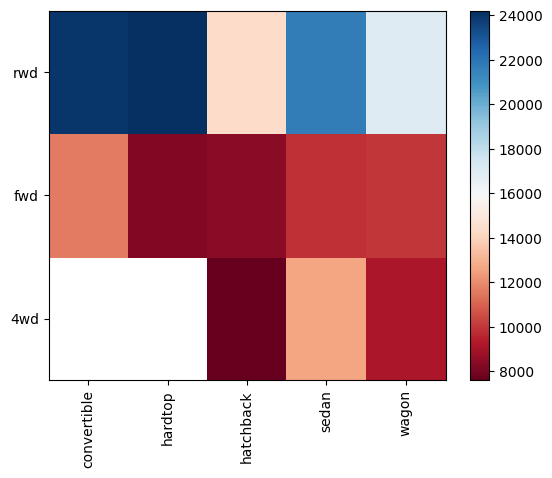

In [72]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

### 3. Correlation 

In [73]:
df[['symboling', 'normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size']].corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000


(0.0, 53222.18962451167)

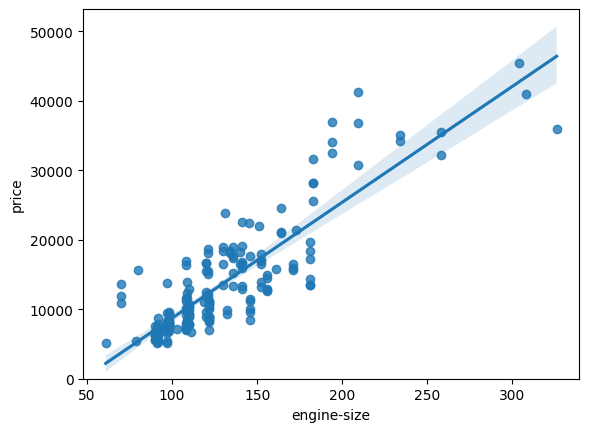

In [74]:
# correlation: +ve linaer relationship
import seaborn as sns
sns.regplot(x='engine-size', y='price',data=df)
plt.ylim(0,)

(0.0, 48178.79629566821)

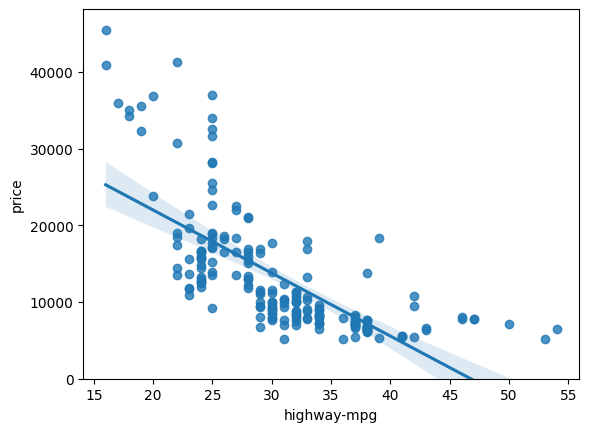

In [51]:
# correlation: -ve linaer relationship
import seaborn as sns
sns.regplot(x='highway-mpg', y='price',data=df)
plt.ylim(0,)

(0.0, 47414.1)

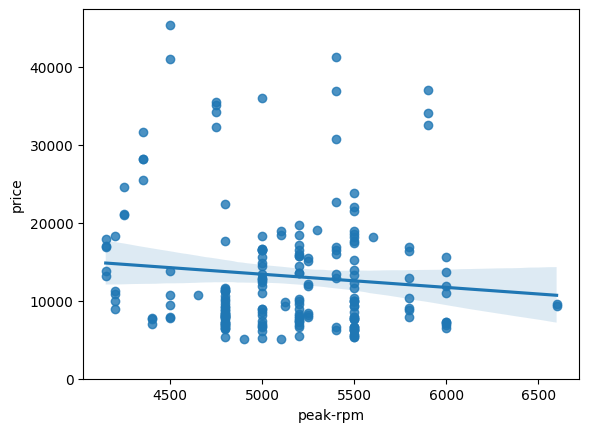

In [52]:
# correlation: weak relationship
import seaborn as sns
sns.regplot(x='peak-rpm', y='price',data=df)
plt.ylim(0,)

### 4. Correlation Statstics

#### 4.1 pearson coorealtion: 

In [63]:
import scipy.stats as stats

In [64]:
p_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
p_coef, p_value 

(0.8095745670036559, 6.369057428259526e-48)

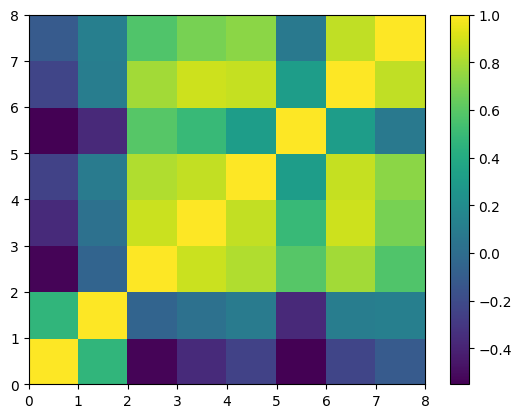

In [83]:
# coorealtion heatmap
df_corr =  df[['symboling', 'normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size']].corr()
plt.pcolor(df_corr)
plt.colorbar()
plt.show()

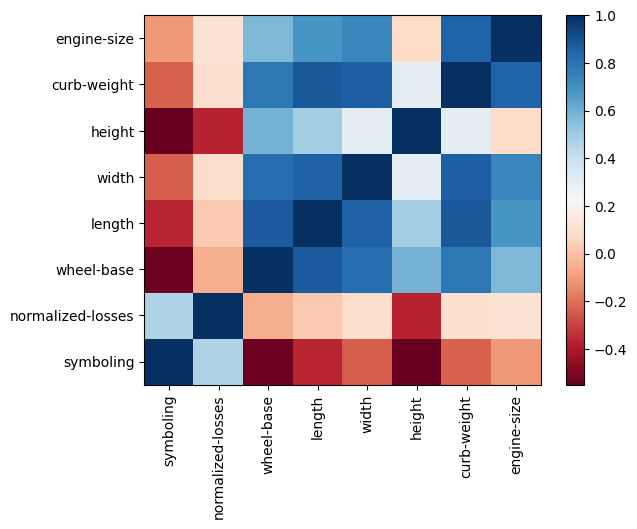

In [86]:
fig, ax = plt.subplots()
im = ax.pcolor(df_corr, cmap='RdBu')

#label names
row_labels = df_corr.columns
col_labels = df_corr.index

#move ticks and labels to the center
ax.set_xticks(np.arange(df_corr.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(df_corr.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

### 4. chi-square test

In [87]:
# example: is there any association b/w fuel-type and aspiration

#     observed values fuel-type vs aspiration
#             standard    turbo   
# deisel        7           13
# gas          161          24

#     observed values fuel-type vs aspiration(calculationg row total and coumn totals)
#             standard    turbo   total
# deisel        7           13     20
# gas          161          24    185
# total        168          37    205

#    calculating expected values = (row_total * column_total)/grand_total

#  calculated values fuel-type vs aspiration(calculationg row total and coumn totals)
#             standard    turbo   total
# deisel      16.39        3.61     20
# gas         151.61      33.39    185
# total        168         37      205

# caluclate X2 =29.6, get p-value based on X2 value from probability table.
# based on p-value, reject null hypothesies or accept (null hypothesis: both the varibles are indpendent)

In [93]:
df_x2 = pd.DataFrame(np.array([[7,13],[161,24]]), columns = ['standard','turbo'])

In [95]:
df_x2.index = ['deisel', 'gas']

In [97]:
df_x2

,standard,turbo
deisel,7,13
gas,161,24


In [103]:
import scipy.stats
result = scipy.stats.chi2_contingency(df_x2,correction=True)
result

Chi2ContingencyResult(statistic=29.605759385109046, pvalue=5.2947382636786724e-08, dof=1, expected_freq=array([[ 16.3902439,   3.6097561],
       [151.6097561,  33.3902439]]))

In [106]:
result.pvalue < 0.05 # reject null hypothesis, two values are dependent

True

### 5. Anova

In [107]:
# If our price variable is strongly correlated with the variable we are analyzing, we expect ANOVA to return a sizeable F-test score and a small p-value.
# Since ANOVA analyzes the difference between different groups of the same variable, the groupby function will come in handy.
# Because the ANOVA algorithm averages the data automatically, we do not need to take the average before hand.
# To see if different types of 'drive-wheels' impact 'price', we group the data.

In [118]:
grouped_test2=df[['drive-wheels', 'price']].groupby(['drive-wheels'])
grouped_test2.head()

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
2,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
6,fwd,17710.0
7,fwd,18920.0
8,fwd,23875.0
9,rwd,16430.0


In [109]:
grouped_test2.get_group('4wd')['price']

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4600\4164424613.py:1: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  grouped_test2.get_group('4wd')['price']


4      17450.0
136     7603.0
140     9233.0
141    11259.0
144     8013.0
145    11694.0
150     7898.0
151     8778.0
Name: price, dtype: float64

In [110]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'], grouped_test2.get_group('4wd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 67.95406500780399 , P = 3.3945443577149576e-23


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4600\531361513.py:1: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'], grouped_test2.get_group('4wd')['price'])


In [113]:
# This is a great result with a large F-test score showing a strong correlation and a P-value of almost 0 implying almost certain statistical significance.
# But does this mean all three tested groups are all this highly correlated? Let's examine them separately.

In [111]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 130.5533160959111 , P = 2.2355306355677366e-23


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4600\1567334666.py:1: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'])


In [112]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('rwd')['price'])  
   
print( "ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 8.580681368924756 , P = 0.004411492211225367


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4600\32254271.py:1: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('rwd')['price'])
